# FE 690 Machine Learning in Finance - Assignment 2

## Text Analysis of SEC Filings

**Contributors:** Diyan Rahaman

In this project I tried to study the effect of financial reports filed by companies to the Securities and Exchange Commission (SEC), on the consequent returns for that financial year. 

I studied the Annual 10-K earnings reports for 500 of the companies that make up the S&P 500 using filings downloaded from the SEC's Electronic Data Gathering, Analysis and Retrieval (EDGAR) website [1] from 2008 to 2018. 

I analyzed the sentiment expressed in the Risk Section (Item 1A.) and tried to correlate it with the quarterly returns observed in the year the report is filed.

## Background

The initial hypothesis that the information contained in financial reports required by the SEC for publicly traded firms in the United States provided can be used to predict subsequent price movements was made in a paper called Lazy Prices (NBER Working Paper No. 25084) by Lauren Cohen, Christopher Malloy, and Quoc Nguyen [2]. In this paper, they study the language and construction of all financial reports required by the SEC for publicly traded firms in the United States over the two decades beginning in 1995. They construct portfolios of firms that had few textual changes in quarter-to-quarter reports and firms that had many changes, and find that portfolios that were long "non-changers" and short "changers" earned a statistically significant value-weighted abnormal return of between 34 and 58 basis points per month—between 4 and 7 percent per year—over the following year [3].

## Approach

In this project I approached this task in the following way:

1. Get a list of companies that comprises the S&P 500 Index from the Wiki website [4], using the `BeautifulSoup` library to web scrape the table containing the components and get a list containing the company name, ticker symbol and CIK (Central Index Key) assigned to the company by the SEC. This list is saved off to a file called `companies.csv` to be used in later processing.

2. For each CIK in the list of 500 companies that comprises the S&P 500 I pulled the Risk Section (Item 1A.) from 10-K filings which have been downloaded previously from 10-K filings by Bill McDonald [5]. The text filings are processed using code in `sec.py` to read the file, clean it of unicode characters and extract the Risk Section. The period studied is between 2008 and 2018 and the resulting sentiments obtained by running the VADER sentiment analyzer for each company for each filing year is saved off to a file called `sentiments.csv` for further processing.

3. For each company and year for which a risk sentiment has been determined, we use the code in `returns.py` to get the price history of the company using their ticker symbol for a given year and calculating the quarterly returns that would result at the end of each quarter. All this data, along with the original sentiment data is now saved to a file called `resturns.csv` which will be analyzed further.


## Analysis of Data

### 1. Load the results data and remove any rows with missing data

Due to processing constraints, I was only able to run the processing for 50 companies for 3 years of data for 2015 to 2018. The results data from `results.csv` file was loaded into a pandas dataframe and removed any rows that have missing data.

In [12]:
import pandas as pd

resdata = pd.read_csv(r".\Data\returns.csv")
results = resdata.dropna()
results.head()

,Name,Symbol,CIK,Year,Quarter,Sentiment,Q1,Q2,Q3,Q4
0,Rollins Inc.,ROL,84839,2018,QTR1,0.0,0.093891,0.127117,0.300965,0.146945
1,Rollins Inc.,ROL,84839,2017,QTR1,0.0,0.108689,0.215587,0.377725,0.389370
2,Rollins Inc.,ROL,84839,2016,QTR1,0.0,0.071937,0.156917,0.157312,0.335178
3,Exxon Mobil Corp.,XOM,34088,2018,QTR1,1.0,-0.122545,-0.027049,-0.000118,-0.198283
4,Exxon Mobil Corp.,XOM,34088,2017,QTR1,1.0,-0.097700,-0.111783,-0.098031,-0.079767


### 2. Exploratory Analysis

The quarterly returns for each quarter following the release of the 10-K report was analyzed against the sentiment polarity expressed in the Risk Section of the report using the VADER sentiment analyzer library and an estimated linear regression was run using the `scikitlearn` library to see if there is any linear relationship.

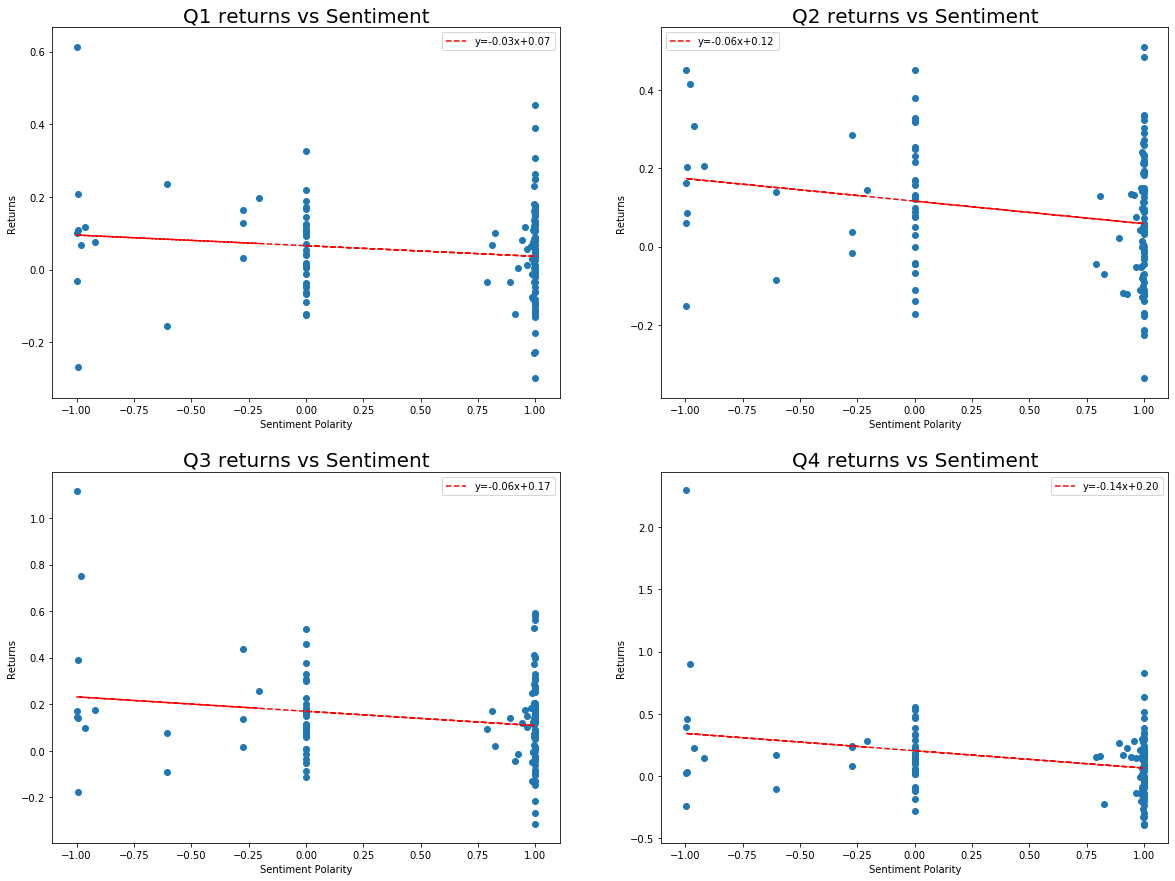

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 15))

try: 
    lm1 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q1"]).reshape(-1,1))
except:
    lm1 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q1"]).reshape(-1,1))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.scatter(results["Sentiment"], results["Q1"])
ax1.plot(results["Sentiment"], lm1.predict(np.array(results["Sentiment"]).reshape(-1,1)),"r--", 
         label=f'y={lm1.coef_[0][0]:.2f}x+{lm1.intercept_[0]:.2f}')
ax1.set_title('Q1 returns vs Sentiment', fontsize=20)
ax1.set_xlabel("Sentiment Polarity")
ax1.set_ylabel("Returns")
ax1.legend()

try:
    lm2 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q2"]).reshape(-1,1))
except:
    lm2 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q2"]).reshape(-1,1))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.scatter(results["Sentiment"], results["Q2"])
ax2.plot(results["Sentiment"], lm2.predict(np.array(results["Sentiment"]).reshape(-1,1)),"r--", 
         label=f'y={lm2.coef_[0][0]:.2f}x+{lm2.intercept_[0]:.2f}')
ax2.set_title('Q2 returns vs Sentiment', fontsize=20)
ax2.set_xlabel("Sentiment Polarity")
ax2.set_ylabel("Returns")
ax2.legend()

try:
    lm3 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q3"]).reshape(-1,1))
except:
    lm3 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q3"]).reshape(-1,1))
ax3 = plt.subplot2grid((2, 2), (1, 0))
ax3.scatter(results["Sentiment"], results["Q3"])
ax3.plot(results["Sentiment"], lm3.predict(np.array(results["Sentiment"]).reshape(-1,1)),"r--", 
         label=f'y={lm3.coef_[0][0]:.2f}x+{lm3.intercept_[0]:.2f}')
ax3.set_title('Q3 returns vs Sentiment', fontsize=20)
ax3.set_xlabel("Sentiment Polarity")
ax3.set_ylabel("Returns")
ax3.legend()

try:
    lm4 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q4"]).reshape(-1,1))
except:
    lm4 = LinearRegression().fit(np.array(results["Sentiment"]).reshape(-1,1), 
                             np.array(results["Q4"]).reshape(-1,1))
ax4 = plt.subplot2grid((2, 2), (1, 1))
ax4.scatter(results["Sentiment"], results["Q4"])
ax4.plot(results["Sentiment"], lm4.predict(np.array(results["Sentiment"]).reshape(-1,1)),"r--", 
         label=f'y={lm4.coef_[0][0]:.2f}x+{lm4.intercept_[0]:.2f}')
ax4.set_title('Q4 returns vs Sentiment', fontsize=20)
ax4.set_xlabel("Sentiment Polarity")
ax4.set_ylabel("Returns")
ax4.legend()

plt.show()

### 3. Companies with best and worst sentiments

Next, the average quarterly returns for the top 10 companies with the most positive sentiments were compared with the bottom 10 companies with the most negative sentiments to see if there was any difference in their relative returns that could be used for a pair trading strategy.

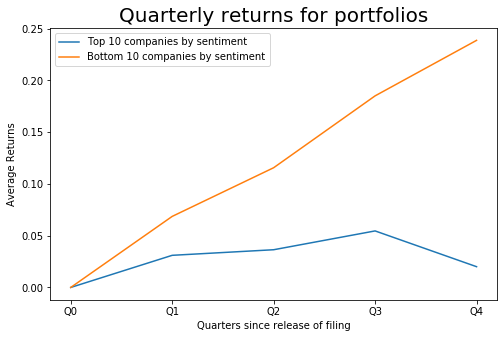

In [14]:
top10res = results.groupby("Year").apply(lambda x: x.nlargest(10, "Sentiment"))[['Q1','Q2','Q3','Q4']]
top10ret = top10res.groupby('Year').mean()
top10ret.insert(0,"Q0", 0.0)

bot10res = results.groupby("Year").apply(lambda x: x.nsmallest(10, "Sentiment"))[['Q1','Q2','Q3','Q4']]
bot10ret = bot10res.groupby('Year').mean()
bot10ret.insert(0,"Q0", 0.0)

fig = plt.figure(figsize=(8, 5))

plt.plot(top10ret.mean(), label='Top 10 companies by sentiment')
plt.plot(bot10ret.mean(), label='Bottom 10 companies by sentiment')
plt.title('Quarterly returns for portfolios', fontsize=20)
plt.xlabel('Quarters since release of filing')
plt.ylabel('Average Returns')
plt.legend()

plt.show()

## Conclusion

### Observations

The following results were observed in this project:

* The sentiment polarities generated seem to cluster as highly negative (-1), highly positive (+1) or neutral (0).

* The returns for each quarter following a 10-K filings shows a very slight negative linear correlation with the polarity of the sentiment expressed in the filing.

* The Bottom 10 stocks seem to outperform the Top 10 stocks for returns at the end of each quarter after the release of the filing.

### Further Study

There is scope for further study of the SEC filings made by companies and their correlation with subsequent returns:

1. Consider training my own sentiment analyzer specifically on 10-K filings rather than the VADER sentiment analyzer which seems to cluster the sentiment polarities at extremes.

2. Consider additional measures of sentiment such as Uncertainty and Litigiousness as defined by Loghran and McDonald [6].

3. Consider changes in the filings from period to period for the same company. In "Lazy Prices" by Cohen, Malloy and Nguyen [2] define at least 4 different similarity measures:

    + Cosine Similarity, 
    + Jacaard Similarity, 
    + Minimum Edit Distance and 
    + Simple Changes. 


4. Consider the sentiments and changes expressed by other sections of the 10-K filings such as the following:

    + Item 1 Business 
    + Item 1A Risk Factors 
    + Item 2 Properties 
    + Item 3 Legal Proceedings 
    + Item 4 Mine Safety Disclosures 
    + Item 5 Market for Registrant’s Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities 
    + Item 6 Selected Financial Data 
    + Item 7 Management’s Discussion and Analysis of Financial Condition and Results of Operations 
    + Item 7A Quantitative and Qualitative Disclosures About Market Risk 
    + Item 8 Financial Statements and Supplementary Data 
    + Item 9 Changes in and Disagreements With Accountants on Accounting and Financial Disclosure 
    + Item 9A Controls and Procedures 
    + Item 9B Other Information 
    + Item 10 Directors, Executive Officers and Corporate Governance 
    + Item 11 Executive Compensation 
    + Item 12 Security Ownership of Certain Beneficial Owners and Management and Related Stockholder Matters 
    + Item 13 Certain Relationships and Related Transactions, and Director Independence 
    + Item 14 Principal Accounting Fees and Services 


5. Use all of the above factors as input variables to a Machine Learning model to try and predict the subsequent price of the company stock in the days, months, quarters, years following the release of the SEC filing being studied.

### Lessons Learned

Text analysis is a computationally intensive process that is best implemented in a cloud environment where large amounts of resources can be allocated on demand. I had a hard time trying analyze more than a few hundred documents even using pre-trained sentiment analyzers.

A large part of text analysis is to clean and extract the data needed for analysis and a lot of time was spent tweaking the regular expression code to accomodate various document formats. Text documents being unstructured data, it is almost impssible to handle all scenarios and most likely I have missed some of the Risk Sections in the 10-K documents.

The pre-trained models may not be the best fit for specialized SEC documents and it may have been better to try and train my own model on the type of documents that I was intending to analyze. A general pupose sentiment analyzer like VADER showed some skewing in the scores generated.


## References

[1] **https://www.sec.gov/edgar/**

[2] **Cohen, Lauren, Malloy, Christopher, Nguyen, Quoc**, "Lazy Prices", _Working Paper 25084, NATIONAL BUREAU OF ECONOMIC RESEARCH_, (2018).

[3] **Are Investors Inattentive to SEC-Mandated Corporate Reports?**, _Digest, NATIONAL BUREAU OF ECONOMIC RESEARCH_, (November 2018).

[4] **https://en.wikipedia.org/wiki/List_of_S%26P_500_companies**

[5] **https://sraf.nd.edu/data/stage-one-10-x-parse-data/**

[6] **Loughran, Tim, and Bill McDonald**, "When Is a Liability Not a Liability? Textual Analysis, Dictionaries, and 10-Ks", _Journal of Finance 66, 35—65_, (2011).